In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.ChemUtils import SDFToCSV
IPythonConsole.ipython_useSVG=True
from rdkit.Chem import AllChem
import csv
import pandas as pd
import random

## Read file and filter experiment

In [2]:
folder = "C:\\Users\\vswen\\Documents\\1. Biomedische Technologie\\BMT JAAR 5\\Kwart 4\\4. Data\\CTRPv2.0_2015_ctd2_ExpandedDataset\\"
generate = False
if generate == True:
    df = pd.read_csv(f"{folder}v20.data.per_cpd_well.txt", sep='\t')
    filtered_df = df[df['experiment_id'] == 419].reset_index(drop=True)
    filtered_df.to_csv(f"{folder}v20.data.per_cpd_well_419.txt", sep='\t', index=False)
else:
    filtered_df = pd.read_csv(f"{folder}v20.data.per_cpd_well_419.txt", sep='\t')

In [3]:
filtered_df

,experiment_id,assay_plate_barcode,raw_value_log2,bsub_value_log2,dmso_zscore_log2,cpd_conc_umol,master_cpd_id
0,419,AU053858,11.560,-0.044030,-0.12760,0.00030,1788
1,419,AU062968,11.420,-0.059780,-0.17330,0.00030,1788
2,419,AU053858,11.630,0.024330,0.07051,0.00061,1788
3,419,AU062968,11.430,-0.053900,-0.15620,0.00061,1788
4,419,AU053858,11.600,-0.000697,-0.00202,0.00120,1788
...,...,...,...,...,...,...,...
13574,419,AU062970,10.930,-0.346200,-1.00300,17.00000,710154
13575,419,AU062969,11.260,-0.068620,-0.19890,33.00000,710154
13576,419,AU062970,10.710,-0.558700,-1.62000,33.00000,710154
13577,419,AU062969,10.910,-0.417100,-1.20900,66.00000,710154


In [4]:
filtered_df['master_cpd_id'].value_counts()

290356    90
659993    60
595102    32
616408    32
632104    32
          ..
58472     15
580922    15
660890    14
411863    14
411724    13
Name: master_cpd_id, Length: 448, dtype: int64

In [5]:
from collections import defaultdict
input_file = "C:\\Users\\vswen\\Documents\\1. Biomedische Technologie\\BMT JAAR 5\\Kwart 4\\4. Data\\CTRPv2.0_2015_ctd2_ExpandedDataset\\v20.data.curves_post_qc.txt"

def get_unique_numbers(input_file):
    numbers = defaultdict(int)
    with open(input_file, 'r') as f:
        for line in f:
            line = line.strip()
            cols = line.split('\t')
            if len(cols) >= 17:
                number = cols[16]
                numbers[number] += 1

    return numbers

unique_numbers = get_unique_numbers(input_file)
for number, frequency in unique_numbers.items():
    print(number, frequency)


master_cpd_id 1
1788 319
3588 828
12877 860
19153 816
23256 839
25036 817
25334 828
25344 856
26870 229
26874 816
26914 800
26956 845
26972 834
26979 860
27871 419
27872 831
27894 775
28172 874
28183 794
28452 855
28784 866
28801 766
29985 835
30371 821
30620 868
32372 821
32622 855
33166 841
35319 415
36599 878
37190 878
37479 847
39782 854
44511 871
44554 867
44580 874
46792 808
48589 859
50131 804
50134 868
50140 217
50163 860
50715 767
50727 849
50732 855
50737 817
50753 842
50769 221
52123 875
52430 849
52576 788
52582 820
52882 864
52928 856
53556 789
54210 860
55307 864
55512 826
56703 870
58339 844
58442 214
58472 815
58566 814
60218 847
60679 227
61097 869
61674 864
61724 417
61775 224
62111 824
62602 864
62690 857
63349 813
63578 863
96171 712
100490 418
102193 428
119769 813
122255 828
142931 833
153820 849
154846 864
176181 416
182395 862
183526 426
185987 743
199337 846
255961 837
267119 846
272805 829
290356 870
345041 845
347775 868
347812 835
347813 872
348633 803
34899

In [6]:
input_file = "C:\\Users\\vswen\\Documents\\1. Biomedische Technologie\\BMT JAAR 5\\Kwart 4\\4. Data\\CTRPv2.0_2015_ctd2_ExpandedDataset\\v20.data.curves_post_qc_419.txt"
output_file = "C:\\Users\\vswen\\Documents\\1. Biomedische Technologie\\BMT JAAR 5\\Kwart 4\\4. Data\\CTRPv2.0_2015_ctd2_ExpandedDataset\\v20.data.curves_post_qc_419_summary.txt"

def copy_columns(input_file, output_file, column_indices):
    with open(input_file, 'r') as f_input, open(output_file, 'w') as f_output:
        for line in f_input:
            columns = line.strip().split('\t')
            selected_columns = [columns[i] for i in column_indices]
            f_output.write('\t'.join(selected_columns) + '\n')
            
column_indices = [0, 9, 13, 15, 16]  

copy_columns(input_file, output_file, column_indices)


In [7]:
df_large = pd.read_csv(f"{folder}v20.data.curves_post_qc_419.txt", sep='\t')
df_summary = df_large[[ 'master_cpd_id','apparent_ec50_umol']]

In [8]:
# df_summary = pd.read_csv(f"{folder}v20.data.curves_post_qc_419_summary.txt", sep='\t')
df_summary

,master_cpd_id,apparent_ec50_umol
0,1788,2.326000e+01
1,3588,9.864000e+00
2,12877,2.045000e+01
3,17712,0.000000e+00
4,18311,1.024000e+01
...,...,...
441,682993,2.936000e+10
442,686134,6.940000e+01
443,688888,9.165000e-01
444,705300,5.507000e-01


In [9]:
df_summary.sort_values(by=['apparent_ec50_umol']).head(25)

,master_cpd_id,apparent_ec50_umol
246,608062,0.000000e+00
287,636711,0.000000e+00
333,660140,0.000000e+00
94,185987,0.000000e+00
345,660201,0.000000e+00
359,660227,0.000000e+00
263,616353,0.000000e+00
268,622913,0.000000e+00
3,17712,0.000000e+00
129,375487,0.000000e+00


In [10]:
df_smiles = pd.read_csv(f"{folder}v20.meta.per_compound.txt", sep="\t")
df_smiles.head()

,master_cpd_id,cpd_name,broad_cpd_id,top_test_conc_umol,cpd_status,inclusion_rationale,gene_symbol_of_protein_target,target_or_activity_of_compound,source_name,source_catalog_id,cpd_smiles
0,1788,CIL55,BRD-K46556387,10.0,probe,pilot-set,NaN,screening hit,Columbia University,NaN,CN(C)CCNC(=O)c1cc2CSc3cc(Cl)ccc3-c2s1
1,3588,BRD4132,BRD-K86574132,160.0,probe,chromatin;pilot-set,NaN,screening hit,ChemDiv Inc.,4998-1380,CC(C)N1C(=O)S\C(=C\c2ccc(Sc3nc4ccccc4[nH]3)o2)...
2,12877,BRD6340,BRD-K35716340,33.0,probe,chromatin;pilot-set,NaN,screening hit,ChemDiv Inc.,1988-0090,C(Cn1c2ccccc2c2ccccc12)c1nc2ccccc2[nH]1
3,17712,ML006,BRD-K89692698,530.0,probe,pilot-set,S1PR3,agonist of sphingosine 1-phosphate receptor 3,Enamine Ltd.,Z1037336336,C1CN(CCO1)c1nnc(-c2ccccc2)c(n1)-c1ccccc1
4,18311,Bax channel blocker,BRD-A18763547,33.0,probe,pilot-set,BAX,inhibitor of BAX-mediated mitochondrial cytoch...,Maybridge,RJC01737,OC(CN1CCNCC1)Cn1c2ccc(Br)cc2c2cc(Br)ccc12


In [20]:
df_all = pd.merge(df_summary, df_smiles, on='master_cpd_id', how='left')

extracted_col = df_all["cpd_smiles"]
df_summary = df_summary.join(extracted_col)
df_summary

,master_cpd_id,apparent_ec50_umol,cpd_smiles
0,1788,2.326000e+01,CN(C)CCNC(=O)c1cc2CSc3cc(Cl)ccc3-c2s1
1,3588,9.864000e+00,CC(C)N1C(=O)S\C(=C\c2ccc(Sc3nc4ccccc4[nH]3)o2)...
2,12877,2.045000e+01,C(Cn1c2ccccc2c2ccccc12)c1nc2ccccc2[nH]1
3,17712,0.000000e+00,C1CN(CCO1)c1nnc(-c2ccccc2)c(n1)-c1ccccc1
4,18311,1.024000e+01,OC(CN1CCNCC1)Cn1c2ccc(Br)cc2c2cc(Br)ccc12
...,...,...,...
441,682993,2.936000e+10,COc1ccc(cc1)C1(CNC(=O)c2ccc(NC(=O)c3ccco3)cc2)...
442,686134,6.940000e+01,CC1=NN(C(=O)C\1=N\Nc1ccccc1C(O)=O)c1nc(cs1)-c1...
443,688888,9.165000e-01,COc1ccc(cc1)C#CC1=CCCN(C(=O)\C=C\c2cc(OC)c(OC)...
444,705300,5.507000e-01,CC1(O)CC(C1)c2nc(c3ccc4ccc(nc4c3)c5ccccc5)c6c(...


,master_cpd_id,apparent_ec50_umol,cpd_smiles
0,1788,2.326000e+01,CN(C)CCNC(=O)c1cc2CSc3cc(Cl)ccc3-c2s1
1,3588,9.864000e+00,CC(C)N1C(=O)S\C(=C\c2ccc(Sc3nc4ccccc4[nH]3)o2)...
2,12877,2.045000e+01,C(Cn1c2ccccc2c2ccccc12)c1nc2ccccc2[nH]1
3,17712,0.000000e+00,C1CN(CCO1)c1nnc(-c2ccccc2)c(n1)-c1ccccc1
4,18311,1.024000e+01,OC(CN1CCNCC1)Cn1c2ccc(Br)cc2c2cc(Br)ccc12
...,...,...,...
441,682993,2.936000e+10,COc1ccc(cc1)C1(CNC(=O)c2ccc(NC(=O)c3ccco3)cc2)...
442,686134,6.940000e+01,CC1=NN(C(=O)C\1=N\Nc1ccccc1C(O)=O)c1nc(cs1)-c1...
443,688888,9.165000e-01,COc1ccc(cc1)C#CC1=CCCN(C(=O)\C=C\c2cc(OC)c(OC)...
444,705300,5.507000e-01,CC1(O)CC(C1)c2nc(c3ccc4ccc(nc4c3)c5ccccc5)c6c(...


In [12]:
df_all_sorted = df_all.sort_values(by=['apparent_ec50_umol'])



In [13]:
df_all_sorted.to_csv(f"{folder}v20.data.final_summary.txt", sep='\t', index=False)

In [14]:
import numpy as np
from tqdm.auto import tqdm
from rdkit.Chem.QED import qed
from rdkit.Chem import Descriptors, rdMolDescriptors
from sklearn import preprocessing as pre

def mol_descriptor(smiles: list[str], scale: bool = True) -> np.ndarray:

    X = []
    for smi in tqdm(smiles):
        m = Chem.MolFromSmiles(smi)
        x = np.array([Descriptors.TPSA(m),
                      Descriptors.MolLogP(m),
                      Descriptors.MolWt(m),
                      Descriptors.FpDensityMorgan2(m),
                      Descriptors.HeavyAtomMolWt(m),
                      Descriptors.MaxPartialCharge(m),
                      Descriptors.MinPartialCharge(m),
                      Descriptors.NumRadicalElectrons(m),
                      Descriptors.NumValenceElectrons(m),
                      rdMolDescriptors.CalcFractionCSP3(m),
                      rdMolDescriptors.CalcNumRings(m),
                      rdMolDescriptors.CalcNumRotatableBonds(m),
                      rdMolDescriptors.CalcNumLipinskiHBD(m),
                      rdMolDescriptors.CalcNumLipinskiHBA(m),
                      rdMolDescriptors.CalcNumHeterocycles(m),
                      rdMolDescriptors.CalcNumHeavyAtoms(m),
                      rdMolDescriptors.CalcNumAromaticRings(m),
                      rdMolDescriptors.CalcNumAtoms(m),
                      qed(m)])
        X.append(x)

    if scale:
        return pre.MinMaxScaler().fit_transform(np.array(X))
    
    return np.array(X)

 
smiles_column = df_all_sorted['cpd_smiles']

# Call the mol_descriptor function with the 'cpd_smiles' values
descriptors = mol_descriptor(smiles_column)

# Add the descriptors to your existing DataFrame
df_all_sorted[['TPSA', 'MolLogP', 'MolWt', 'FpDensityMorgan2', 'HeavyAtomMolWt',
               'MaxPartialCharge', 'MinPartialCharge', 'NumRadicalElectrons',
               'NumValenceElectrons', 'CalcFractionCSP3', 'CalcNumRings',
               'CalcNumRotatableBonds', 'CalcNumLipinskiHBD', 'CalcNumLipinskiHBA',
               'CalcNumHeterocycles', 'CalcNumHeavyAtoms', 'CalcNumAromaticRings',
               'CalcNumAtoms', 'qed']] = descriptors
df_all_sorted.to_csv(f"{folder}v20.data.final_summary.txt", sep='\t', index=False)


# Print the modified DataFrame
df_all_sorted

  0%|          | 0/446 [00:00<?, ?it/s]

,master_cpd_id,apparent_ec50_umol,cpd_name,broad_cpd_id,top_test_conc_umol,cpd_status,inclusion_rationale,gene_symbol_of_protein_target,target_or_activity_of_compound,source_name,...,CalcFractionCSP3,CalcNumRings,CalcNumRotatableBonds,CalcNumLipinskiHBD,CalcNumLipinskiHBA,CalcNumHeterocycles,CalcNumHeavyAtoms,CalcNumAromaticRings,CalcNumAtoms,qed
246,608062,0.000000e+00,BRD8899,BRD-K22828899,33.0,probe,lit-search;synthesis,STK33,inhibitor of serine/threonine kinasase STK33,Broad Institute of MIT and Harvard,...,0.411765,0.230769,0.052083,0.054545,0.075949,0.333333,0.082305,0.250,0.078351,0.767458
287,636711,0.000000e+00,alisertib,BRD-K75295174,66.0,clinical,CTEP;kinome,AURKA;AURKB,inhibitor of aurora kinases A and B,Selleck,...,0.111111,0.384615,0.062500,0.036364,0.088608,0.333333,0.131687,0.500,0.098969,0.349934
333,660140,0.000000e+00,BRD-K99584050,BRD-K99584050,66.0,probe,outreach,NaN,stapled helical peptide,Dana Farber Cancer Institute,...,0.544000,0.461538,0.750000,0.800000,0.797468,0.333333,0.757202,0.625,0.758763,0.001307
94,185987,0.000000e+00,MI-1,BRD-K64497429,33.0,probe,lit-search,MEN1,binder of menin; inhibitor of menin-MLL fusion...,InterBioScreen Ltd.,...,0.631579,0.384615,0.010417,0.000000,0.050633,0.666667,0.086420,0.250,0.086598,0.790725
345,660201,0.000000e+00,necrostatin-7,BRD-K50145167,66.0,probe,lit-search,NaN,inhibitor of necroptosis,Cayman,...,0.000000,0.307692,0.031250,0.036364,0.063291,0.500000,0.082305,0.375,0.053608,0.725458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,375560,1.752000e+12,Ki8751,BRD-K47150025,66.0,probe,kinome,KDR;KIT;PDGFRA,"inhibitor of VEGFR2, c-KIT, and PDGFRA",Selleck,...,0.083333,0.307692,0.062500,0.036364,0.075949,0.166667,0.119342,0.500,0.088660,0.373019
7,23256,4.400000e+12,betulinic acid,BRD-K45401373,66.0,probe,chromatin;lit-search,NaN,natural product; inhibitor of specificity prot...,Tocris Bioscience,...,0.900000,0.384615,0.020833,0.036364,0.025316,0.000000,0.115226,0.000,0.148454,0.457961
315,660081,3.535000e+14,GSK4112,BRD-K78667050,66.0,probe,lit-search,NR1D1,antagonist of Rev-ErbAalpha,Tocris Bioscience,...,0.388889,0.153846,0.072917,0.000000,0.063291,0.166667,0.086420,0.250,0.078351,0.405137
308,659226,8.877000e+15,VAF-347,BRD-K96335988,66.0,probe,lit-search;synthesis,AHR,inhibitor of aryl hydrocarbon receptor,Broad Institute of MIT and Harvard,...,0.058824,0.230769,0.031250,0.018182,0.025316,0.166667,0.078189,0.375,0.053608,0.709721


In [15]:
final_database = pd.read_csv(f"{folder}v20.data.final_summary.txt", sep='\t')

final_smiles = final_database.loc[:,"cpd_smiles"]
final_smiles_short = random.choices(final_smiles, k=5)
random_smile = random.choices(final_smiles)

#random_smile
final_smiles_short

['Clc1cc(Cl)c(OCC(=O)N\\N=C\\c2ccc[nH]2)c(Cl)c1',
 'CC(C)n1cnc2c(NCc3ccccc3)nc(NCCO)nc12',
 'OC(=O)c1ccc(NCc2nc3cc4ccccc4cc3[nH]2)cc1',
 'FC(F)(F)c1ccc(Nc2nccc(n2)-c2cccc(Cl)c2)cc1',
 'CCC(=O)OCN1C(=O)C=CC1=O']

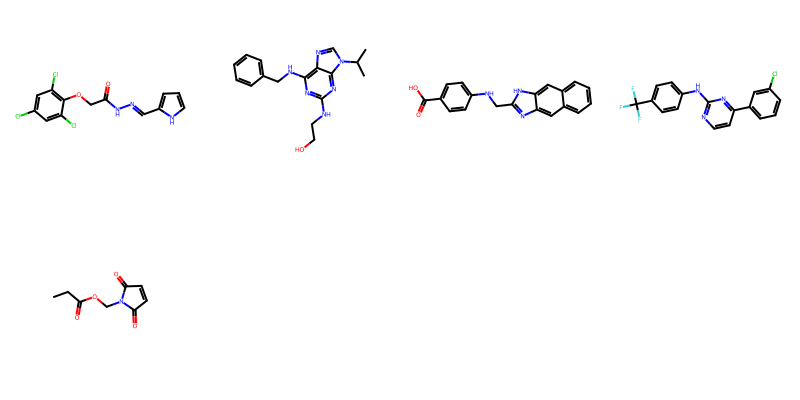

In [16]:
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in final_smiles_short], molsPerRow=4, subImgSize=(200,200))    

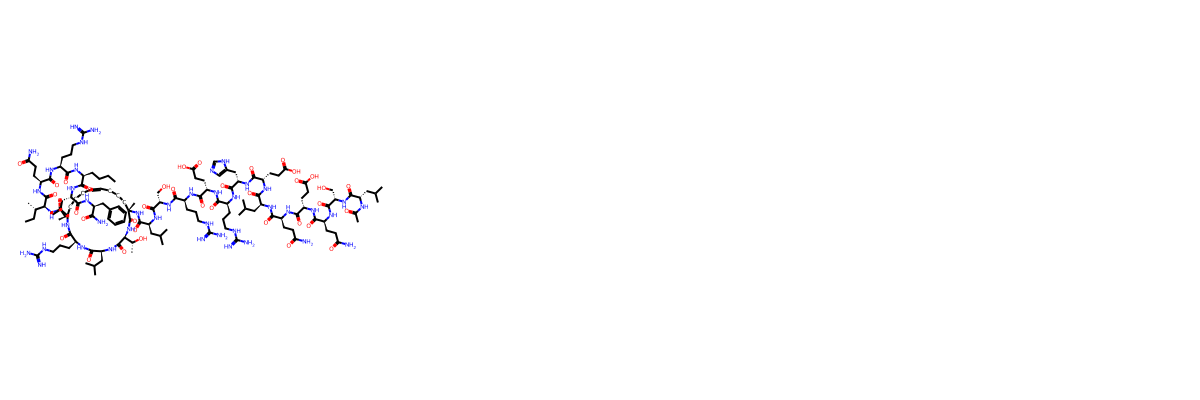

In [17]:
random_smile = random.choices(final_smiles)
Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in random_smile], subImgSize=(400,400))


In [18]:
# FINGERPRINT TESTING

from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D, Generate

n = ''.join(random_smile)
m = Chem.MolFromSmiles(n)

Topological_fingerprint = FingerprintMols.FingerprintMol(m)
MACCS_key = MACCSkeys.GenMACCSKeys(m)
Morgan_fingerprint = AllChem.GetMorganFingerprint(m, 2)
Morgan_fingerprint_bit = AllChem.GetMorganFingerprintAsBitVect(m, 2)
Pharma_fingerprint = Generate.Gen2DFingerprint(m, Gobbi_Pharm2D.factory)
